# Calculating Viscosity from liquid compositions
- This notebook shows how to calculate Viscosity using Giordano et al. (2008)
- You can download the Excel spreadsheet from: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Other_features/Viscoity_Giordano.xlsx

In [3]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

## Lets load in some melt compositions from a MELTS model published in Wieser et al. (2022)

In [4]:
Liqs_import2=pt.import_excel('Viscoity_Giordano.xlsx', sheet_name='MELTSTest', suffix="_Liq")
Liqs2=Liqs_import2['Liqs']
Liqs_input2=Liqs_import2['my_input']

## Lets calculate viscosity at the temperature stored in the column "Temp HT1987_K"
- This T needs to be in Kelvin

In [5]:
Melts_Vis_HT=pt.calculate_viscosity_giordano_2008(liq_comps=Liqs2, 
                                                  T=Liqs_input2['Temp HT1987_K'])

Text(0.5, 0, 'MgO content Liq')

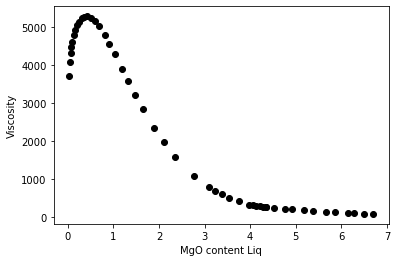

In [6]:
plt.plot( Melts_Vis_HT['MgO_Liq'], Melts_Vis_HT['n_melt'], 'ok')
plt.ylabel('Viscosity')
plt.xlabel('MgO content Liq')

## With different F2O contents
- By default, we perform calculations with no F, to use the same input structure as the rest of the liquids
- However, Giordano parameterize in terms of F2O, so you can enter this straight in the function
- We have 2 functions, allowing you to convert from F2O to F and back

In [7]:
F2O_calc=pt.convert_F_to_F2O(F_ppm=1000)
F2O_calc

0.14210723396066502

In [8]:
F_calc=pt.convert_F2O_to_F_ppm(F2O_wt=F2O_calc)
F_calc

1000.0

In [11]:
WithF=pt.calculate_viscosity_giordano_2008(liq_comps=Liqs2, 
                                    T=Liqs_input2['Temp HT1987_K'],
                                     F2O_content=F2O_calc)

Text(0.5, 0, 'MgO content Liq')

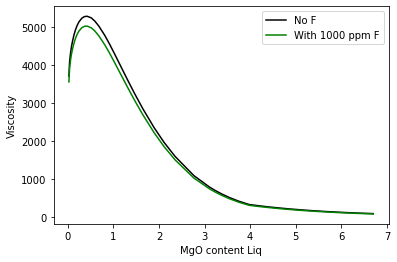

In [14]:
plt.plot( Melts_Vis_HT['MgO_Liq'], Melts_Vis_HT['n_melt'], '-k', label='No F')
plt.plot( WithF['MgO_Liq'], WithF['n_melt'], '-g', label='With 1000 ppm F')
plt.legend()
plt.ylabel('Viscosity')
plt.xlabel('MgO content Liq')